In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('compressed_data.csv', usecols=['id', 'NAME', 'price', 'service fee', 'room type', 'neighbourhood', 'neighbourhood group', 'review rate number','number of reviews', 'last review', 'reviews per month'])

In [3]:
data.head()

,id,NAME,neighbourhood group,neighbourhood,room type,price,service fee,number of reviews,last review,reviews per month,review rate number
0,1001254,Clean & quiet apt home by the park,Brooklyn,Kensington,Private room,$966,$193,9.0,10/19/2021,0.21,4.0
1,1002102,Skylit Midtown Castle,Manhattan,Midtown,Entire home/apt,$142,$28,45.0,5/21/2022,0.38,4.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,Private room,$620,$124,0.0,NaN,NaN,5.0
3,1002755,NaN,Brooklyn,Clinton Hill,Entire home/apt,$368,$74,270.0,7/5/2019,4.64,4.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,Entire home/apt,$204,$41,9.0,11/19/2018,0.10,3.0


In [4]:
data.columns = data.columns.str.lower()

In [5]:
data.columns = data.columns.str.replace(" ", "_")

In [6]:
data['price'] = data['price'].str.replace("$", "")

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   102599 non-null  int64  
 1   name                 102349 non-null  object 
 2   neighbourhood_group  102570 non-null  object 
 3   neighbourhood        102583 non-null  object 
 4   room_type            102599 non-null  object 
 5   price                84449 non-null   float64
 6   service_fee          0 non-null       float64
 7   number_of_reviews    102416 non-null  float64
 8   last_review          86706 non-null   object 
 9   reviews_per_month    86720 non-null   float64
 10  review_rate_number   102273 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 8.6+ MB


In [8]:
(data.isnull().sum()/data.shape[0])*100

id                      0.000000
name                    0.243667
neighbourhood_group     0.028265
neighbourhood           0.015595
room_type               0.000000
price                   0.240743
service_fee             0.266084
number_of_reviews       0.178364
last_review            15.490404
reviews_per_month      15.476759
review_rate_number      0.317742
dtype: float64

In [9]:
data.isnull().sum()

id                         0
name                     250
neighbourhood_group       29
neighbourhood             16
room_type                  0
price                    247
service_fee              273
number_of_reviews        183
last_review            15893
reviews_per_month      15879
review_rate_number       326
dtype: int64

In [10]:
data['service_fee'] = pd.to_numeric(data['service_fee'], errors='coerce')

In [11]:
data['price'] = pd.to_numeric(data['price'], errors='coerce')

In [42]:
data['price'] = data['price'].astype(float, errors='ignore')

In [44]:
data['last_review'] = pd.to_datetime(data['last_review'], errors='coerce')

In [46]:
data.describe()

,id,number_of_reviews,last_review,reviews_per_month,review_rate_number
count,1.025990e+05,102416.000000,86706,86720.000000,102273.000000
mean,2.914623e+07,27.483743,2019-06-12 03:40:52.065601024,1.374022,3.279106
min,1.001254e+06,0.000000,2012-07-11 00:00:00,0.010000,1.000000
25%,1.508581e+07,1.000000,2018-10-28 00:00:00,0.220000,2.000000
50%,2.913660e+07,7.000000,2019-06-14 00:00:00,0.740000,3.000000
75%,4.320120e+07,30.000000,2019-07-05 00:00:00,2.000000,4.000000
max,5.736742e+07,1024.000000,2058-06-16 00:00:00,90.000000,5.000000
std,1.625751e+07,49.508954,NaN,1.746621,1.284657


# WHAT IS THE DISTRIBUTION OF LISTING PRICES

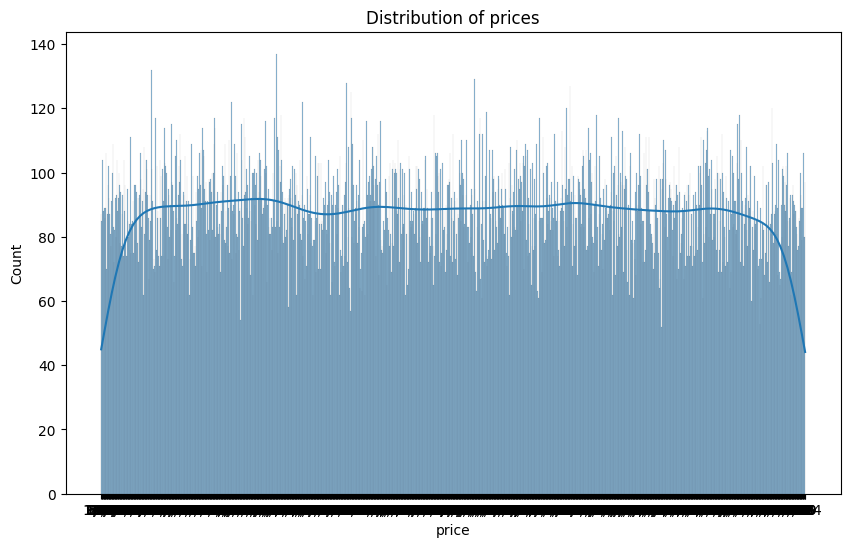

In [50]:
plt.figure(figsize=(10,6))
sns.histplot(x='price', data=data, kde=True)
plt.title("Distribution of prices")
plt.show()

# WHAT IS THE RELATION BETWEEN REVIWES AMD PRICE OF THE AIRBNB

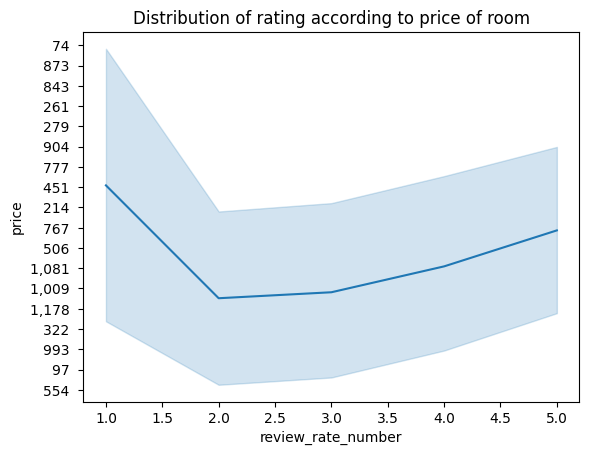

In [19]:
sns.lineplot(y='price', x='review_rate_number', data=data)
plt.title("Distribution of rating according to price of room")
plt.show()

# HOW ARE DIFFERENT ROOM TYPES DISTRIBUTED?

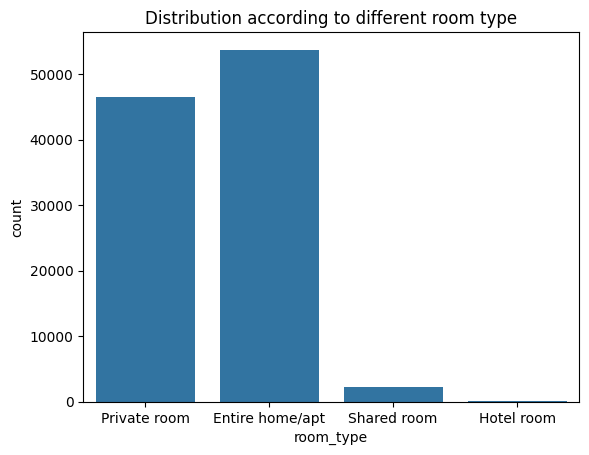

In [113]:
sns.countplot(x='room_type', data=data)
plt.title("Distribution according to different room type")
plt.show()

# HOW ARE LISTINGS DISTRIBUTED ACROOS DIFFERENT NEIGHBOURHOOD?

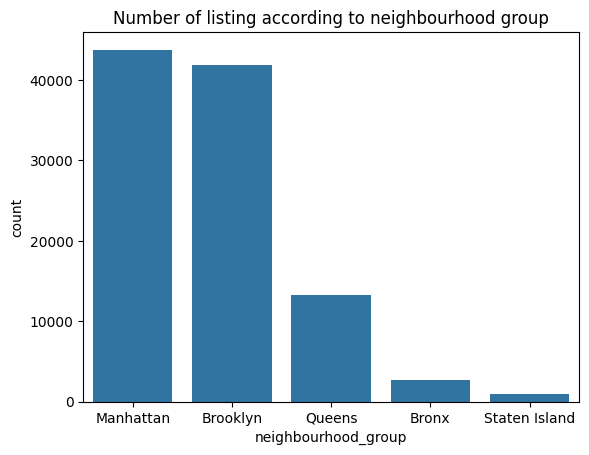

In [125]:
sns.countplot(x='neighbourhood_group', data=data, order=data['neighbourhood_group'].value_counts().index)
plt.title("Number of listing according to neighbourhood group")
plt.show()

# RELATIONSHIP BETWEEN LISTING AND ROOM TYPE

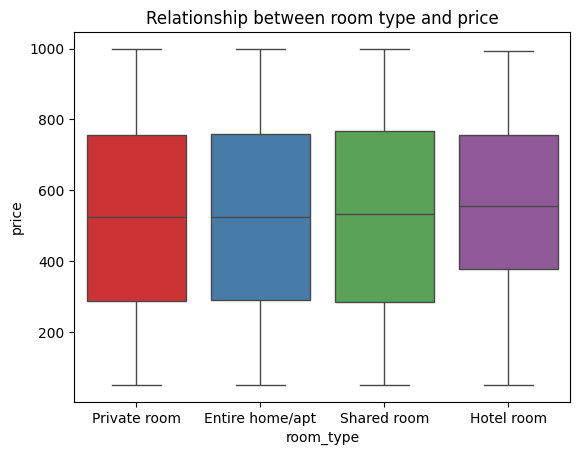

In [130]:
sns.boxplot(x='room_type', y='price', data=data, hue='room_type', palette='Set1')
plt.title("Relationship between room type and price")
plt.show()

# HOW HAS THE NUMBER OF REVIEWS CAHNGED OVER TIME?

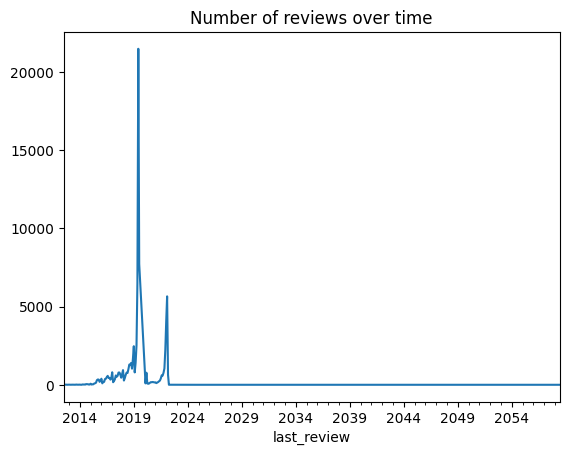

In [60]:
months = data.groupby(data['last_review'].dt.to_period('M')).size()
months.plot(kind='line')
plt.title('Number of reviews over time')
plt.show()

<Axes: xlabel='review_rate_number', ylabel='count'>

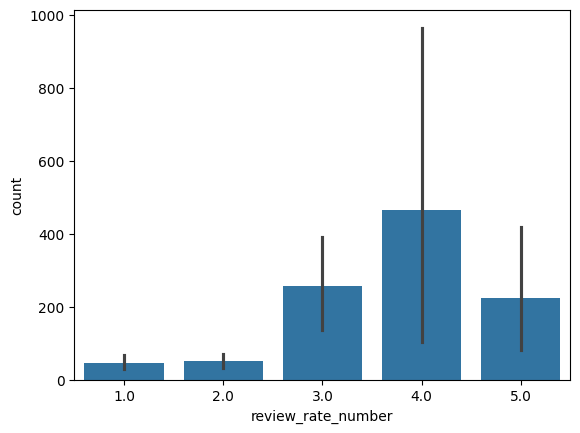

In [77]:
sns.barplot(x='review_rate_number', y=data['number_of_reviews'].value_counts(), data=data)

In [73]:
data['number_of_reviews'].value_counts()

number_of_reviews
0.0       15734
1.0       10408
2.0        7175
3.0        5375
4.0        4151
          ...  
1010.0        1
446.0         1
490.0         1
400.0         1
300.0         1
Name: count, Length: 476, dtype: int64